# Word Representation in Biomedical Domain

Before you start, please make sure you have read this notebook. You are encouraged to follow the recommendations but you are also free to develop your own solution from scratch. 

## Marking Scheme

- Biomedical imaging project: 40%
    - 25%: accuracy of the final model on the test set
    - 15%: rationale of model design and final report
- Natural language processing project: 40%
    - 30%: completeness of the project
    - 10%: final report
- Presentation skills and team work: 20%


This project forms 40\% of the total score for summer/winter school. The marking scheme of each part of this project is provided below with a cap of 100\%.

You are allowed to use open source libraries as long as the libraries are properly cited in the code and final report. The usage of third-party code without proper reference will be treated as plagiarism, which will not be tolerated.

You are encouraged to develop the algorithms by yourselves (without using third-party code as much as possible). We will factor such effort into the marking process.

## Setup and Prerequisites 

Recommended environment

- Python 3.7 or newer
- Free disk space: 100GB

Download the data

```sh
# navigate to the data folder
cd data

# download the data file
# which is also available at https://www.semanticscholar.org/cord19/download
wget https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/2021-07-26/document_parses.tar.gz

# decompress the file which may take several minutes
tar -xf document_parses.tar.gz

# which creates a folder named document_parses
```

## Part 1 (20%): Parse the Data

The JSON files are located in two sub-folders in `document_parses`. You will need to scan all JSON files and extract text (i.e. `string`) from relevant fields (e.g. body text, abstract, titles).

You are encouraged to extract full article text from body text if possible. If the hardware resource is limited, you can extract from abstract or titles as alternatives. 

Note: The number of JSON files is around 425k so it may take more than 10 minutes to parse all documents.

For more information about the dataset: https://www.semanticscholar.org/cord19/download

Recommended output:

- A list of text (`string`) extracted from JSON files.

In [8]:
###################
# TODO: add your solution
import json
import os
path='./document_parses/pdf_json'
text=os.listdir(path)
result1=[]
for i in text:
    position=path+'/'+i
    with open(position,'r') as f:
        a=json.load(f)
    result1.append(a['metadata']['title'])
    for k in a['abstract']:
        result1.append(k['text'])    
    for j in a['body_text']:
        result1.append(j['text'])
    with open ('pdf.txt',"a",encoding="utf-8") as f:
        f.writelines(result1)
path='./document_parses/pmc_json'
text=os.listdir(path)
texts = []
titles = []
text1=[]
for i in range(len(text)):
    text1.append(text[i])
for i in text1:
    position=path+'/'+i
    with open(position,'r') as f:
        a=json.load(f)
    titles.append(a['metadata']['title'])
    for j in a['body_text']:
        texts.append(j['text'])
    with open ('pmc.txt',"a",encoding="utf-8") as f:
        f.writelines(texts)
    with open ('titles.txt','a',encoding='utf-8') as f:
        f.writelines(titles)
###################

## Part 2 (30%): Tokenization

Traverse the extracted text and segment the text into words (or tokens).

The following tracks can be developed in independentely. You are encouraged to divide the workload to each team member.

Recommended output:

- Tokenizer(s) that is able to tokenize any input text.

Note: Because of the computation complexity of tokenizers, it may take hours/days to process all documents. Which tokenizer is more efficient? Any idea to speedup?

### Track 2.1 (10%): Use split()

Use the standard `split()` by Python.

### Track 2.2 (10%): Use NLTK or SciSpaCy

NLTK tokenizer: https://www.nltk.org/api/nltk.tokenize.html

SciSpaCy: https://github.com/allenai/scispacy

Note: You may need to install NLTK and SpaCy so please refer to their websites for installation instructions.

### Track 2.3 (10%): Use Byte-Pair Encoding (BPE)

Byte-Pair Encoding (BPE): https://huggingface.co/transformers/tokenizer_summary.html

Note: You may need to install Huggingface's transformers so please refer to its website for installation instructions.

### Track 2.4 (Bonus +5%): Build new Byte-Pair Encoding (BPE)

This track may be dependent on track 2.3.

The above pre-built tokenization methods may not be suitable for biomedical domain as the words/tokens (e.g. diseases, sympotoms, chemicals, medications, phenotypes, genotypes etc.) can be very different from the words/tokens commonly used in daily life. Can you build and train a new BPE model for biomedical domain in particular?

### Open Question (Optional):

- What are the pros and cons of the above tokenizers?

In [14]:
###################
# TODO: add your solution
# 2.1 split()
split_out = []
for text in texts:
    split_out.append(text.split())
print(split_out[0])
###################

['With', 'over', '1', 'billion', 'users', '[1],', 'Instagram', 'is', 'one', 'of', 'the', 'most', 'widely', 'used', 'social', 'media', 'platforms', 'in', 'the', 'world.', 'It', 'is,', 'first', 'and', 'foremost,', 'a', 'visual', 'platform,', 'centered', 'around', 'sharing', 'user-generated', 'photos', 'and', 'videos', 'accompanied', 'by', 'captions.', 'Instagram', 'allows', 'users', 'to', 'search', 'for', 'photos', 'by', '“hashtag.”', 'A', 'hashtag', 'is', 'a', 'word', 'or', 'phrase', 'preceded', 'by', 'the', 'pound', '(#)', 'symbol,', 'which,', 'when', 'typed', 'in', 'the', 'caption', 'of', 'the', 'photo,', 'makes', 'the', 'photo', 'searchable', 'by', 'that', 'term.', 'Importantly,', 'Instagram', 'users', 'have', 'the', 'option', 'to', 'make', 'their', 'photos', 'private', 'or', 'public.', 'Public', 'photos', 'are', 'visible', 'to', 'anyone—even', 'those', 'without', 'an', 'Instagram', 'account.', 'Without', 'an', 'Instagram', 'account,', 'site', 'visitors', 'can', 'only', 'scroll', 'th

In [13]:
# 2.2 NLTK
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
word_tok = []
for text in texts:
    word_tok.append(word_tokenize(text))
print(word_tok[0])

['With', 'over', '1', 'billion', 'users', '[', '1', ']', ',', 'Instagram', 'is', 'one', 'of', 'the', 'most', 'widely', 'used', 'social', 'media', 'platforms', 'in', 'the', 'world', '.', 'It', 'is', ',', 'first', 'and', 'foremost', ',', 'a', 'visual', 'platform', ',', 'centered', 'around', 'sharing', 'user-generated', 'photos', 'and', 'videos', 'accompanied', 'by', 'captions', '.', 'Instagram', 'allows', 'users', 'to', 'search', 'for', 'photos', 'by', '“', 'hashtag.', '”', 'A', 'hashtag', 'is', 'a', 'word', 'or', 'phrase', 'preceded', 'by', 'the', 'pound', '(', '#', ')', 'symbol', ',', 'which', ',', 'when', 'typed', 'in', 'the', 'caption', 'of', 'the', 'photo', ',', 'makes', 'the', 'photo', 'searchable', 'by', 'that', 'term', '.', 'Importantly', ',', 'Instagram', 'users', 'have', 'the', 'option', 'to', 'make', 'their', 'photos', 'private', 'or', 'public', '.', 'Public', 'photos', 'are', 'visible', 'to', 'anyone—even', 'those', 'without', 'an', 'Instagram', 'account', '.', 'Without', 'an

In [15]:
##### data processing for deleting punctuations.
import re
punc = '~`!#$%^&*()_+-=|\';":/.,?><~·！@#￥%……&*（）——+-=“：’；、。，？》《{}⪢Δ×−±∈∑⪡”∏%['
l1=[]
l2=[]
with open("pmc.txt","r",encoding="utf-8") as f:
    data=f.read()
    l1=sent_tokenize(data)
l3=[]
for list in l1:
    string = re.sub(r"[%s]+"%punc, " ", list)
    string=re.sub("\]","",string)
    l3.append(string)
with open("words.txt","w",encoding="utf-8") as fi:
    for i in l3:
        fi.writelines(i+"\n")

In [9]:
########2.3 BPE algorithm
with open('words.txt','r',encoding='utf-8') as f:
    ag = f.read().lower().split('\n')
ttwords = []
for k in ag:
    ttwords.extend(k.split(' '))
wordf = set(ttwords)
with open('bpe_vocab.txt','w',encoding='utf-8') as f:
    for s in wordf:
        f.write(s)
        f.write(' ')
from tokenizers import ByteLevelBPETokenizer
tokenizr = ByteLevelBPETokenizer()# AutoTokenizer.from_pretrained("seyonec/PubChem10M_SMILES_BPE_450k")
tokenizr.train('bpe_vocab.txt',special_tokens=[' '])
toks = []
for p in ag:
    toks.append(tokenizr.encode(p).tokens)
import numpy as np
np.save('tokenized_bpe.npy',np.asarray(toks))
print(toks[:3])

/tmp/ipykernel_2237/3855422108.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save('tokenized_bpe.npy',np.asarray(toks))


[['re', 'com', 'bin', 'ation', ' ', 'e', 'ver', 'y', ' ', 'd', 'ay', ' ', ' ', 'ab', 'und', 'ant', ' ', 're', 'com', 'bin', 'ation', ' ', 'in', ' ', 'a', ' ', 'v', 'irus', ' ', 'd', 'uring', ' ', 'a', ' ', 's', 'ing', 'le', ' ', 'm', 'ul', 'ti', ' ', 'cellular', ' ', 'h', 'ost', ' ', 'in', 'f', 'ection', 'as', ' ', 'inc', 'reas', 'ing', ' ', 'numb', 'ers', ' ', 'o', 'f', ' ', 'f', 'ull', ' ', 'l', 'ength', ' ', 'vir', 'al', ' ', 'se', 'qu', 'ences', ' ', 'b', 'ec', 'ome', ' ', 'av', 'ail', 'able', ' ', ' ', 're', 'com', 'bin', 'ant', ' ', 'or', ' ', 'm', 'os', 'a', 'ic', ' ', 'v', 'irus', 'es', ' ', 'are', ' ', 'b', 'e', 'ing', ' ', 're', 'c', 'ogn', 'ized', ' ', 'm', 'ore', ' ', 'f', 're', 'qu', 'ently', ' ', ' ', ' '], ['re', 'com', 'bin', 'ation', ' ', 'e', 'vents', ' ', 'h', 'ave', ' ', 'b', 'een', ' ', 'd', 'em', 'ons', 'tr', 'ated', ' ', 't', 'o', ' ', 'b', 'e', ' ', 'ass', 'oci', 'ated', ' ', 'w', 'ith', ' ', 'v', 'irus', 'es', ' ', 'ex', 'p', 'anding', ' ', 'the', 'ir', ' ', 'h

In [10]:
#########2.4 build and train BPE with biomedical entities
import spacy
import scispacy
from scispacy.hyponym_detector import HyponymDetector
nlp = spacy.load('en_core_sci_sm')
nlp.add_pipe("hyponym_detector",last=True,config={"extended": False})
def tokenize_en(txt):
    return [tok.text for tok in nlp.tokenizer(txt)]
with open('words.txt','r',encoding='utf-8') as f:
    ag = f.read().lower().split('\n')
ost = []
for a in ag:
    try:
        doc = nlp(a)
    except:
        continue
    ost.extend(doc.ents)
word_set = set(ost)
op = []
for k in ost:
    op.append(str(k))
word_set = set(op)
with open('bio_vocab.txt','w',encoding='utf-8') as f:
    for s in word_set:
        f.write(s)
        f.write(' ')
from tokenizers import ByteLevelBPETokenizer
tokenizr = ByteLevelBPETokenizer()# AutoTokenizer.from_pretrained("seyonec/PubChem10M_SMILES_BPE_450k")
tokenizr.train('bio_vocab.txt',special_tokens=[' '])
toks = []
for p in ag:
    toks.append(tokenizr.encode(p).tokens)
import numpy as np
np.save('tokenized_bio.npy',np.asarray(toks))
print(toks[:2])

/tmp/ipykernel_2237/2710479972.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save('tokenized_bio.npy',np.asarray(toks))


[['re', 'com', 'bin', 'ation', ' ', 'e', 'ver', 'y', ' ', 'd', 'ay', ' ', ' ', 'ab', 'und', 'ant', ' ', 're', 'com', 'bin', 'ation', ' ', 'in', ' ', 'a', ' ', 'virus', ' ', 'd', 'ur', 'ing', ' ', 'a', ' ', 's', 'ing', 'le', ' ', 'm', 'ul', 'ti', ' ', 'cellular', ' ', 'h', 'ost', ' ', 'in', 'fec', 'tion', 'as', ' ', 'in', 'c', 're', 'as', 'ing', ' ', 'n', 'um', 'bers', ' ', 'of', ' ', 'ful', 'l', ' ', 'l', 'ength', ' ', 'viral', ' ', 'se', 'qu', 'ences', ' ', 'b', 'ec', 'ome', ' ', 'av', 'ail', 'able', ' ', ' ', 're', 'com', 'bin', 'ant', ' ', 'or', ' ', 'm', 'os', 'aic', ' ', 'viruses', ' ', 'are', ' ', 'b', 'e', 'ing', ' ', 're', 'c', 'ogn', 'ized', ' ', 'm', 'ore', ' ', 'fre', 'qu', 'ent', 'ly', ' ', ' ', ' '], ['re', 'com', 'bin', 'ation', ' ', 'ev', 'ents', ' ', 'h', 'a', 've', ' ', 'b', 'e', 'en', ' ', 'd', 'em', 'ons', 'tr', 'ated', ' ', 't', 'o', ' ', 'b', 'e', ' ', 'ass', 'oci', 'ated', ' ', 'w', 'ith', ' ', 'viruses', ' ', 'ex', 'p', 'and', 'ing', ' ', 'the', 'ir', ' ', 'h', '

## Part 3 (30%): Build Word Representations

Build word representations for each extracted word. If the hardware resource is limited, you may limit the vocabulary size up to 10k words/tokens (or even smaller) and the dimension of representations up to 256.

The following tracks can be developed independently. You are encouraged to divide the workload to each team member.

### Track 3.1 (15%): Use N-gram Language Modeling

N-gram Language Modeling is to predict a target word by using `n` words from previous context. Specifically,

$P(w_i | w_{i-1}, w_{i-2}, ..., w_{i-n+1})$

For example, given a sentence, `"the main symptoms of COVID-19 are fever and cough"`, if $n=7$, we use previous context `["the", "main", "symptoms", "of", "COVID-19", "are"]` to predict the next word `"fever"`.

More to read: https://web.stanford.edu/~jurafsky/slp3/3.pdf

Recommended outputs:

- A fixed vector for each word/token.

### Track 3.2 (15%): Use Skip-gram with Negative Sampling

In skip-gram, we use a central word to predict its context. Specifically,

$P(w_{c-m}, ... w_{c-1}, w_{c+1}, ..., w_{c+m} | w_c)$

As the learning objective of skip-gram is computational inefficient (summation of entire vocabulary $|V|$), negative sampling is commonly applied to accelerate the training.

In negative sampling, we randomly select one word from the context as a positive sample, and randomly select $K$ words from the vocabulary as negative samples. As a result, the learning objective is updated to

$L = -\log\sigma(u^T_{t} v_c) - \sum_{k=1}^K\log\sigma(-u^T_k v_c)$, where $u_t$ is the vector embedding of positive sample from context, $u_k$ are the vector embeddings of negative samples, $v_c$ is the vector embedding of the central word, $\sigma$ refers to the sigmoid function.

More to read http://web.stanford.edu/class/cs224n/readings/cs224n-2019-notes01-wordvecs1.pdf section 4.3 and 4.4

Recommended outputs:

- A fixed vector for each word/token.

### Track 3.3 (Bonus +5%): Use Contextualised Word Representation by Masked Language Model (MLM)

BERT introduces a new language model for pre-training named Masked Language Model (MLM). The advantage of MLM is that the word representations by MLM will be contextualised.

For example, "stick" may have different meanings in different context. By N-gram language modeling and word2vec (skip-gram, CBOW), the word representation of "stick" is fixed regardless of its context. However, MLM will learn the representation of "stick" dynamatically based on context. In other words, "stick" will have different representations in different context by MLM.

More to read: http://jalammar.github.io/illustrated-bert/ and https://arxiv.org/pdf/1810.04805.pdf

Recommended outputs:

- An algorithm that is able to generate contextualised representation in real time.

In [11]:
###################
# 3.1 N-gram model
with open('words.txt','r',encoding='utf-8') as f:
    text = f.read()
text = text.lower()
print(len(text.split('\n')))
wordso = []
ttwords = []
sent = text.split('\n')
for k in sent:
    wordso.append(k.split())
    ttwords.extend(k.split())
print(len(ttwords))
import tensorflow.compat.v1 as tf
# print(k)
vocab = set(ttwords)
vocab_to_int = {w: c for c, w in enumerate(vocab)}
int_to_vocab = {c: w for c, w in enumerate(vocab)}
def get_targets(words, idx, window_n = 5):
    start_point = idx - window_n if (idx-window_n) > 0 else 0
    targets = words[start_point:idx]
    return targets
vocab_size = len(int_to_vocab)
import random
def get_ngrams(words, window_n=5):
    x, y = [], []
    for sent in words:
        for j in range(0,5):
            if window_n > len(sent)-1:
                continue
            i = random.randint(window_n, len(sent)-1)
            lb = [0]*vocab_size
            lb[sent[i]] = 1
            y.append(lb)
            x.append(get_targets(sent,i,window_n))
    return x,y
window_n = 5
words = []
for k in wordso:
    words.append([vocab_to_int[i] for i in k])
x,y = get_ngrams(words,window_n)
print(len(words))
graph = tf.Graph()
embedding_size = 20
import numpy as np
positionvec = np.zeros((window_n,embedding_size))
for i in range(window_n):
    for j in range(embedding_size):
        if j%2==0:
            positionvec[i][j] = np.sin(i/np.power(10000,j/20))
        else:
            positionvec[i][j] = np.cos(i/np.power(10000,(j-1)/20))

with graph.as_default():
    inputs = tf.placeholder(tf.int32,shape=[window_n],name = 'inputs')
    labels = tf.placeholder(tf.int32,shape=[None],name = 'labels')
    position = tf.constant(positionvec,dtype=tf.float32)
    embedding = tf.Variable(tf.random_uniform([vocab_size, embedding_size]))
    embed = tf.nn.embedding_lookup(embedding, inputs)
    embed = tf.concat([embed,position],1)
    embed2 = tf.reshape(embed,[-1,1])
    softmax_w = tf.Variable(tf.truncated_normal([vocab_size,2*embedding_size*window_n]))
    softmax_b = tf.Variable(tf.zeros(vocab_size,1))
    out = tf.squeeze(tf.matmul(softmax_w,embed2))+softmax_b
    loss = tf.nn.softmax_cross_entropy_with_logits(labels=labels,logits=out)
    cost = tf.reduce_mean(loss)
    optimizer = tf.train.AdamOptimizer().minimize(cost)
print("do")
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1,20):
        loss = 0
        for a,b in zip(x,y):
            feed = {inputs:a,labels:b}
            loss, opt, embeddings,sw,sb = sess.run([cost, optimizer, embedding,softmax_w,softmax_b],feed_dict=feed)
        print(loss)
np.save('embedding.npy',embeddings)
np.save('word_id.npy',np.asarray(list(vocab_to_int.items())))
###################

24183
639833
1
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

do


2022-02-14 21:03:00.071535: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-14 21:03:00.072601: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-14 21:03:00.130604: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-02-14 21:03:00.162719: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:196] None of the MLIR optimization passes are enabled (registered 0 passes)
2022-02-14 21:03:00.245811: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1996235000 Hz


20.191269
19.52494
18.832932
18.134172
17.434204
16.735048
16.037365
15.341304
14.646793
13.953679
13.261782
12.570919
11.880914
11.191619
10.502894
9.814619
9.126699
8.439069
7.751686


In [4]:
# 3.2 skip_gram model
import os
import time
import numpy as np
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import random
from collections import Counter
os.environ['TF_CPP_MIN_LOG_LEVEL']='2' 


In [5]:
with open('./words.txt', "r", encoding="utf-8") as f:
    text = f.read()

In [6]:
def preprocess(text, freq=5):
    text = text.lower()
    text = text.replace('.', ' <PERIOD> ')
    text = text.replace(',', ' <COMMA> ')
    text = text.replace('"', ' <QUOTATION_MARK> ')
    text = text.replace(';', ' <SEMICOLON> ')
    text = text.replace('!', ' <EXCLAMATION_MARK> ')
    text = text.replace('?', ' <QUESTION_MARK> ')
    text = text.replace('(', ' <LEFT_PAREN> ')
    text = text.replace(')', ' <RIGHT_PAREN> ')
    text = text.replace('--', ' <HYPHENS> ')
    text = text.replace('?', ' <QUESTION_MARK> ')
    # text = text.replace('\n', ' <NEW_LINE> ')
    text = text.replace(':', ' <COLON> ')
    words = text.split()
    
    word_counts = Counter(words)
    trimmed_words = [word for word in words if word_counts[word] > freq]

    return trimmed_words


In [7]:
words = preprocess(text)
print(words[:20])

vocab = set(words)
vocab_to_int = {w: c for c, w in enumerate(vocab)}
int_to_vocab = {c: w for c, w in enumerate(vocab)}

print("total words: {}".format(len(words)))
print("unique words: {}".format(len(set(words))))


['recombination', 'every', 'day', 'abundant', 'recombination', 'in', 'a', 'virus', 'during', 'a', 'single', 'multi', 'cellular', 'host', 'infectionas', 'increasing', 'numbers', 'of', 'full', 'length']
total words: 638222
unique words: 6193


In [8]:
int_words = [vocab_to_int[w] for w in words]

t = 1e-5 
threshold = 0.8 

int_word_counts = Counter(int_words)
total_count = len(int_words)
word_freqs = {w: c/total_count for w, c in int_word_counts.items()}
prob_drop = {w: 1 - np.sqrt(t / word_freqs[w]) for w in int_word_counts}
train_words = [w for w in int_words if prob_drop[w] < threshold]

print(len(train_words))


188567


In [9]:
def get_targets(words, idx, window_size=5):
    target_window = np.random.randint(1, window_size+1)
    start_point = idx - target_window if (idx - target_window) > 0 else 0
    end_point = idx + target_window
    targets = set(words[start_point: idx] + words[idx+1: end_point+1])
    return list(targets)


In [10]:
def get_batches(words, batch_size, window_size=5):
    n_batches = len(words) // batch_size
    
    words = words[:n_batches*batch_size]
    
    for idx in range(0, len(words), batch_size):
        x, y = [], []
        batch = words[idx: idx+batch_size]
        for i in range(len(batch)):
            batch_x = batch[i]
            batch_y = get_targets(batch, i, window_size)
            x.extend([batch_x]*len(batch_y))
            y.extend(batch_y)
        yield x, y

In [11]:
train_graph = tf.Graph()
with train_graph.as_default():
    inputs = tf.placeholder(tf.int32, shape=[None], name='inputs')
    labels = tf.placeholder(tf.int32, shape=[None, None], name='labels')

vocab_size = len(int_to_vocab)
embedding_size = 256 

In [12]:
with train_graph.as_default():
    embedding = tf.Variable(tf.random_uniform([vocab_size, embedding_size], -1, 1))
    embed = tf.nn.embedding_lookup(embedding, inputs)

n_sampled = 100

In [13]:
with train_graph.as_default():
    softmax_w = tf.Variable(tf.truncated_normal([vocab_size, embedding_size], stddev=0.1))
    softmax_b = tf.Variable(tf.zeros(vocab_size))
    
    loss = tf.nn.sampled_softmax_loss(softmax_w, softmax_b, labels, embed, n_sampled, vocab_size)
    
    cost = tf.reduce_mean(loss)
    optimizer = tf.train.AdamOptimizer().minimize(cost)


In [14]:
with train_graph.as_default():
    valid_size = 16 
    valid_window = 100
    valid_examples = np.array(random.sample(range(valid_window), valid_size//2))
    valid_examples = np.append(valid_examples, 
                               random.sample(range(1000,1000+valid_window), valid_size//2))
    
    valid_size = len(valid_examples)
    valid_dataset = tf.constant(valid_examples, dtype=tf.int32)
    
    norm = tf.sqrt(tf.reduce_sum(tf.square(embedding), 1, keep_dims=True))
    normalized_embedding = embedding / norm
    valid_embedding = tf.nn.embedding_lookup(normalized_embedding, valid_dataset)
    similarity = tf.matmul(valid_embedding, tf.transpose(normalized_embedding))


Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [15]:
epochs = 100 
batch_size = 1000
window_size = 10 

with train_graph.as_default():
    saver = tf.train.Saver() 

with tf.Session(graph=train_graph) as sess:
    iteration = 1
    loss = 0
    sess.run(tf.global_variables_initializer())

    for e in range(1, epochs+1):
        batches = get_batches(train_words, batch_size, window_size)
        start = time.time()
        # 
        for x, y in batches:
            
            feed = {inputs: x,
                    labels: np.array(y)[:, None]}
            train_loss, _ = sess.run([cost, optimizer], feed_dict=feed)
            
            loss += train_loss
            
            if iteration % 100 == 0: 
                end = time.time()
                print("Epoch {}/{}".format(e, epochs),
                      "Iteration: {}".format(iteration),
                      "Avg. Training loss: {:.4f}".format(loss/100),
                      "{:.4f} sec/batch".format((end-start)/100))
                loss = 0
                start = time.time()
            
            if iteration % 1000 == 0:
                sim = similarity.eval()
                for i in range(valid_size):
                    valid_word = int_to_vocab[valid_examples[i]]
                    top_k = 8
                    nearest = (-sim[i, :]).argsort()[1:top_k+1]
                    log = 'Nearest to [%s]:' % valid_word
                    for k in range(top_k):
                        close_word = int_to_vocab[nearest[k]]
                        log = '%s %s,' % (log, close_word)
                    print(log)
            
            iteration += 1
            
    save_path = saver.save(sess, "./text8.ckpt")
    embed_mat = sess.run(normalized_embedding)

Epoch 1/100 Iteration: 100 Avg. Training loss: 3.8189 0.0637 sec/batch
Epoch 2/100 Iteration: 200 Avg. Training loss: 3.4890 0.0074 sec/batch
Epoch 2/100 Iteration: 300 Avg. Training loss: 2.9732 0.0613 sec/batch
Epoch 3/100 Iteration: 400 Avg. Training loss: 2.7199 0.0142 sec/batch
Epoch 3/100 Iteration: 500 Avg. Training loss: 2.2718 0.0605 sec/batch
Epoch 4/100 Iteration: 600 Avg. Training loss: 2.0351 0.0216 sec/batch
Epoch 4/100 Iteration: 700 Avg. Training loss: 1.7494 0.0620 sec/batch
Epoch 5/100 Iteration: 800 Avg. Training loss: 1.5495 0.0298 sec/batch
Epoch 5/100 Iteration: 900 Avg. Training loss: 1.4088 0.0610 sec/batch
Epoch 6/100 Iteration: 1000 Avg. Training loss: 1.2391 0.0359 sec/batch
Nearest to [greater]: mesothelioma, hyperthermia, malnutrition, wildtype, triad, hopkins, contact, psychosomatic,
Nearest to [classification]: correspond, testosterone, location, observers, stabiliser, cervical, pairwise, alternative,
Nearest to [july]: registered, transported, rcbi, bioc

In [16]:
print(embed_mat)

[[ 0.04822378 -0.14238419 -0.03225556 ... -0.06060687  0.06506667
   0.04482543]
 [-0.04009192 -0.11104596 -0.08910544 ...  0.10958251  0.10423572
   0.00618611]
 [-0.09613103 -0.09919535 -0.00249241 ... -0.03463629  0.08701123
  -0.03667469]
 ...
 [ 0.02485165  0.08778285  0.01156027 ...  0.07604899  0.01446735
  -0.05452442]
 [-0.00410616 -0.07357108  0.03237575 ...  0.04640188  0.02062427
  -0.07585117]
 [-0.07383008  0.01077923 -0.07548279 ...  0.02235464 -0.09099445
  -0.06620634]]


## Part 4 (20%): Explore the Word Representations

The following tracks can be finished independently. You are encouraged to divide workload to each team member.

### Track 4.1 (5%): Visualise the word representations by t-SNE

t-SNE is an algorithm to reduce dimentionality and commonly used to visualise high-dimension vectors. Use t-SNE to visualise the word representations. You may visualise up to 1000 words as t-SNE is highly computationally complex.

More about t-SNE: https://lvdmaaten.github.io/tsne/

Recommended output:

- A diagram by t-SNE based on representations of up to 1000 words.

### Track 4.2 (5%): Visualise the Word Representations of Biomedical Entities by t-SNE

Instead of visualising the word representations of the entire vocabulary (or 1000 words that are selected at random), visualise the word representations of words which are biomedical entities. For example, fever, cough, diabetes etc. Based on the category of those biomedical entities, can you assign different colours to the entities and see if the entities from the same category can be clustered by t-SNE? For example, sinusitis and cough are both respirtory diseases so they should be assigned with the same colour and ideally their representations should be close to each other by t-SNE. Another example, Alzheimer and headache are neuralogical diseases which should be assigned by another colour.

Examples of biomedial ontology: https://www.ebi.ac.uk/ols/ontologies/hp and https://en.wikipedia.org/wiki/International_Classification_of_Diseases

Recommended output:

- A diagram with colours by t-SNE based on representations of biomedical entities.

### Track 4.3 (5%): Co-occurrence

- What are the biomedical entities which frequently co-occur with COVID-19 (or coronavirus)?

Recommended outputs:

- A sorted list of biomedical entities and description on how the entities are selected and sorted.

### Track 4.4 (5%): Semantic Similarity

- What are the biomedical entities which have closest semantic similarity COVID-19 (or coronavirus) based on word representations?

Recommended outputs:

- A sorted list of biomedical entities and description on how the entities are selected and sorted.

### Open Question (Optional): What else can you discover?


In [17]:
# 4.1 Visualise the word representations by t-SNE in skip-gram embedding
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [18]:
viz_words = 1000
tsne = TSNE()
embed_tsne = tsne.fit_transform(embed_mat[:viz_words, :])

Z:\Anaconda3\envs\tensor\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
Z:\Anaconda3\envs\tensor\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


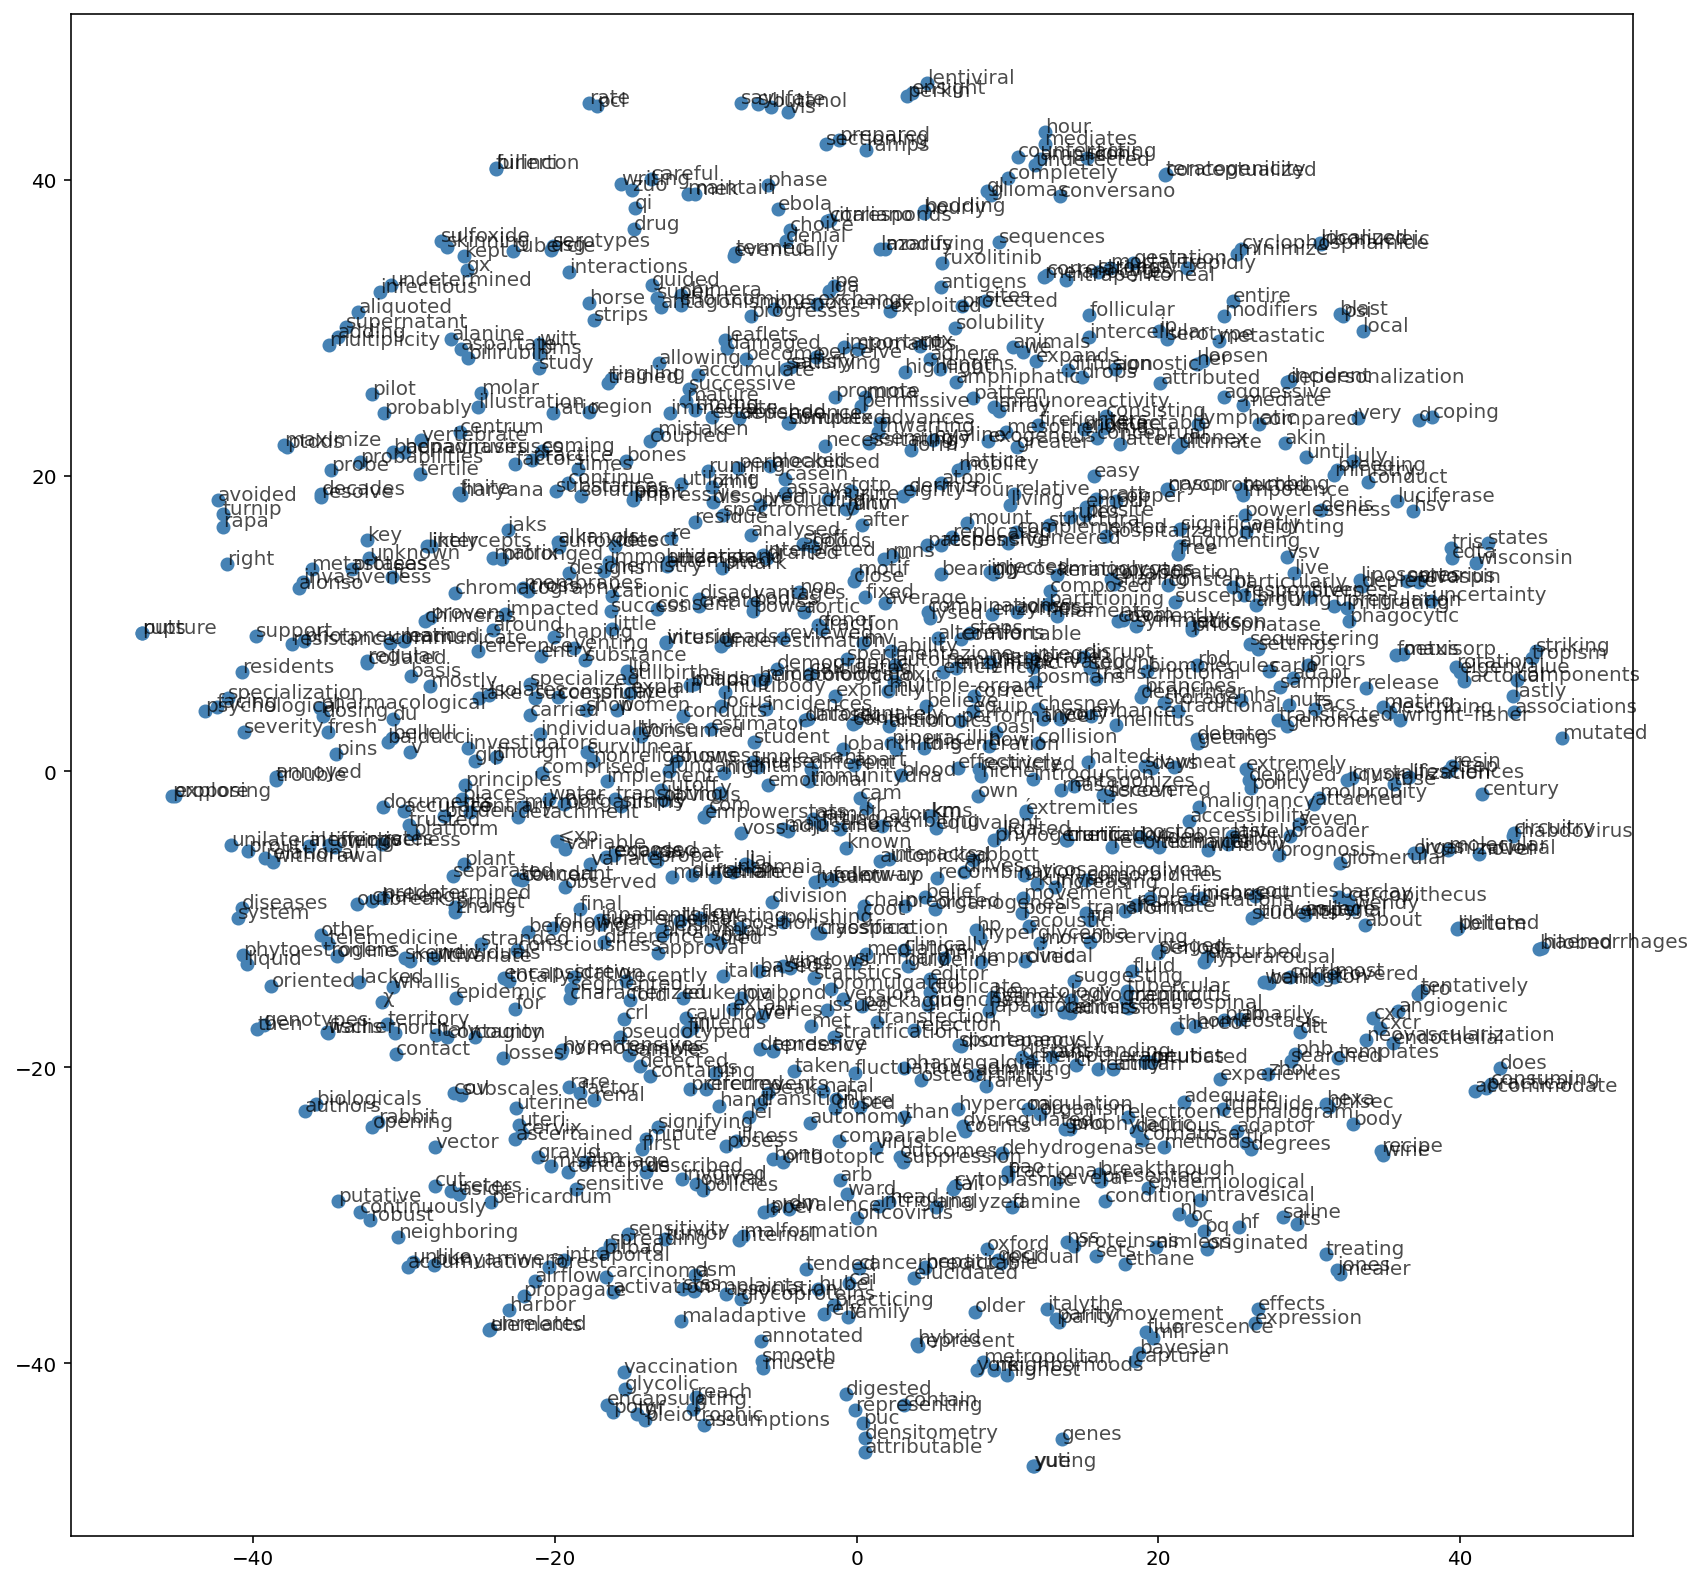

In [19]:
fig, ax = plt.subplots(figsize=(14, 14))
for idx in range(viz_words):
    plt.scatter(*embed_tsne[idx, :], color='steelblue')
    plt.annotate(int_to_vocab[idx], (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7)

/home/wzy/anaconda3/envs/wangzhiyue/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/wzy/anaconda3/envs/wangzhiyue/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


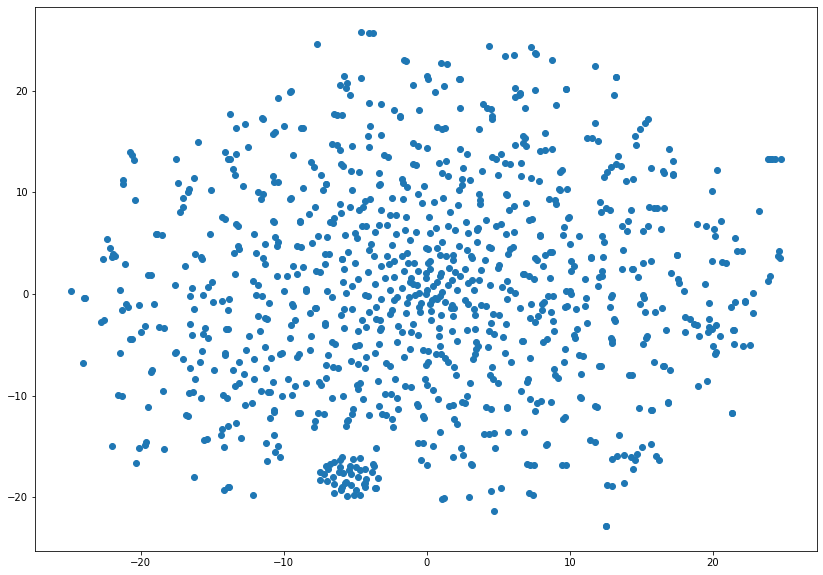

In [24]:
# 4.1: Visualise the word representations by t-SNE in n-gram embedding
import numpy as np
import random
word_id = np.load('word_id.npy')
word_to_id = {}
id_to_word = {}
for k in word_id:
    word_to_id[k[0]] = k[1]
    id_to_word[k[1]] = k[0]
embeddings = np.load('embedding.npy')
ids = []
wordk = []
for wd in word_to_id.keys():
    wordk.append(wd)
while True:
    ir = random.randint(0,len(wordk)-1)
    if not ir in ids:
        ids.append(ir)
    if len(ids)>=1000:
        break
vecs = []
for g in ids:
    vecs.append(embeddings[int(word_to_id[wordk[g]])])
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
tsne = TSNE(n_components=2,random_state = 0)
embedd = tsne.fit_transform(vecs)
plt.figure(figsize=(14,10))
a = 0
b = 1000
plt.scatter(embedd[a:b,0],embedd[a:b,1])
for i in range(0,1000):
    x = embedd[i][0]
    y = embedd[i][1]
    # plt.text(x,y,wordk[ids[i]])
plt.show()

125


/home/wzy/anaconda3/envs/wangzhiyue/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/wzy/anaconda3/envs/wangzhiyue/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


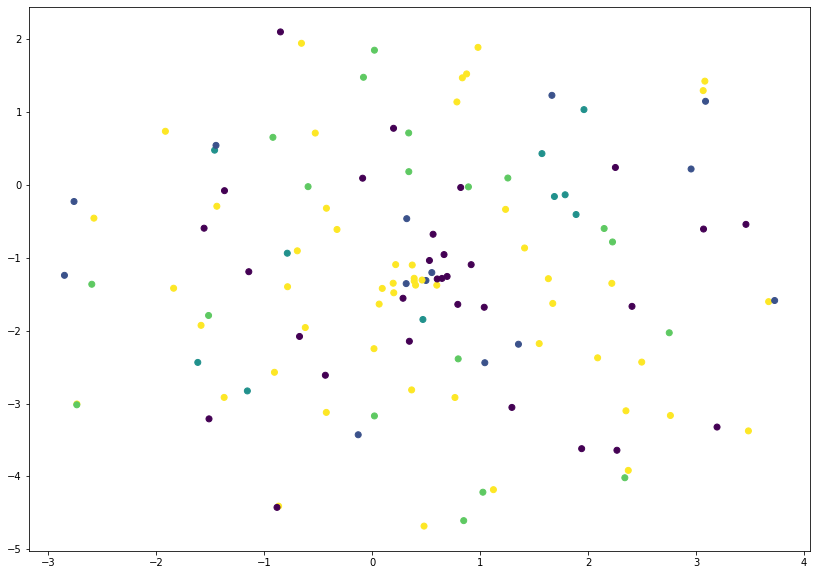

In [3]:
# 4.2: Visualise the Word Representations of Biomedical Entities by t-SNE
import numpy as np
word_id = np.load('word_id.npy')
word_to_id = {}
id_to_word = {}
for k in word_id:
    word_to_id[k[0]] = k[1]
    id_to_word[k[1]] = k[0]
embeddings = np.load('embedding.npy')
vocab = ['nab','anticcp','bevacizumab','trastuzumab',
         'mtor','globulin','fibrinogen','prealbumin','collagen','glycoproteins','ferritin','actin','desmoglein','laminins','fibronectins','proteoglycans','cadherin',
         'corticosteroid','glucocorticoid','steroid','phytoestrogens','insulin',
         'melanoma','sarcoma','mesothelioma','glioma',
         'carcinoma','cancer','tumor',
         'hepatitis','pneumonia','polyarthritis','autoinflammation','dermatomyositis',
         'hypocalcemia','sepsis','hypoglycaemic','ketosis','haemophagocytic','lymphohistiocytosis','pancytopenia',
         'herpes','rash','measles',
         'sars','covid','fever','cov','coronavirus',
         'dyspnea','hepatosplenomegaly','hypertension','proteinuria','hematuria',
         'epilepsy','aki','lupus','erythematosus',
         'ciclosporin','rapamycin',
         'acei','ruxolitinib','sunitinib','genistein',
         'prednisolone',
         'dexamethasone','vero',
         'biliverdin','bilirubin',
         'angiotensin','relaxin','defensins',
         'rheumatology','immunology','pediatric',
         'ck','alt','hdac','kinase','jak','polymerase','enzyme','proteases','collagenase','hyaluronidase',
         'triglycerides','protein','amino','prot','peptides','lipid','agarose','mek','urea','tyrosine','dmso',
         'hpv','vsv','adenovirus','hsv','vaccinia','ras','reovirus','hiv','pararetroviruses','oncovirus','hepadnaviruses','badnaviruses','retroviruses','poxvirus',
         'dna','rna','genome','loci','gene','nucleotide','genebank','genotype','genotoxic','mrna','plasmid',
         'lung','alveolar','antigen','pulmonary']
classes = [6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,4,4,4,4,5,5,5,7,7,7,7,7,
           7,7,7,7,7,7,7,8,8,8,9,9,9,9,9,10,10,10,10,10,7,7,7,7,6,6,13,13,
           13,13,14,6,15,16,16,17,17,17,18,18,18,6,6,6,6,6,6,6,6,6,6,
           6,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,
           22,22,22,22,22,22,22,22,22,22,22,23,23,23,23]
cla = []
for i in classes:
    cla.append((i-2)%5)
vecs = []
for g in vocab:
    vecs.append(embeddings[int(word_to_id[g])])
print(len(vecs))
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
tsne = TSNE(n_components=2,random_state = 0)
embedd = tsne.fit_transform(vecs)
plt.figure(figsize=(14,10))
a = 0
b = 125
plt.scatter(embedd[a:b,0],embedd[a:b,1],c=cla)
for i in range(0,125):
    x = embedd[i][0]
    y = embedd[i][1]
    # if classes[i]==18:
    # plt.text(x,y,vocab[i])
plt.show()

In [18]:
bio_ents = []
for word in word_to_id.keys():
    doc = nlp(str(word))
    if len(doc.ents)>0:
        for ent in doc.ents:
            bio_ents.append(ent)
print(len(word_to_id.keys()),len(bio_ents))

6685 4598


In [19]:
# 4.3: co-occurence
with open('words.txt','r') as f:
    sents = f.read().lower().split('\n')
from collections import Counter
words = []
ttwords = []
for sent in sents:
    word = sent.split()
    if 'covid' in word or 'coronavirus' in word:
        words.append(word)
        ttwords.extend(word)
word_counts = Counter(ttwords)
a = sorted(word_counts.items(),key=lambda x: x[1],reverse=True)
bio_ents_str = []
for k in bio_ents:
    bio_ents_str.append(str(k))
bios = []
for s in a:
    if s[0] in bio_ents_str:
        bios.append(s)
np.save('cocurrence.npy',np.asarray(bios))


('patients', 758) 1520 934


In [2]:
bios = np.load('cocurrence.npy')
print(bios)

[['patients' '758']
 ['coronavirus' '461']
 ['stress' '321']
 ...
 ['infusion' '1']
 ['neutralising' '1']
 ['antibody' '1']]


In [20]:
# 4.4: similarity
vec_covid = embeddings[int(word_to_id['covid'])]
vec_corona = embeddings[int(word_to_id['coronavirus'])]
bio_items = []
# print(word_to_id['pansari'])
if 'the' in bio_ents_str:
    print('yes')
for biow in bio_ents_str:
    if not biow in word_to_id.keys() or biow == 'coronavirus' or biow == 'covid':
        continue
    dis1 = np.sum(np.square(embeddings[int(word_to_id[biow])]-vec_covid))
    dis2 = np.sum(np.square(embeddings[int(word_to_id[biow])]-vec_corona))
    dis = min(dis1,dis2)
    bio_items.append((biow,dis))
a2 = sorted(bio_items,key=lambda x: x[1]) 
np.save('similarity.npy',a2)


In [3]:
a2 = np.load('similarity.npy')
print(a2)

[['comprehensive' '20.197329']
 ['allopathic' '34.66977']
 ['rhabdovirus' '38.383644']
 ...
 ['hirsch' '1524.5901']
 ['tan' '1542.1116']
 ['shin' '1738.7681']]


## Part 5 (Bonus +10%): Open Challenge: Mining Biomedical Knowledge

A fundamental task in clinical/biomedical natural language processing is to extract intelligence from biomedical text corpus automatically and efficiently. More specifically, the intelligence may include biomedical entities mentioned in text, relations between biomedical entities, clinical features of patients, progression of diseases, all of which can be used to predict, understand and improve patients' outcomes. 

This open challenge is to build a biomedical knowledge graph based on the CORD-19 dataset and mine useful information from it. We recommend the following steps but you are also encouraged to develop your solution from scratch.

### Extract Biomedical Entities from Text

Extract biomedical entities (such as fever, cough, headache, lung cancer, heart attack) from text. Note that:

- The biomedical entities may consist of multiple words. For example, heart attack, multiple myeloma etc.
- The biomedical entities may be written in synoynms. For example, low blood pressure for hypotension.
- The biomedical entities may be written in different forms. For example, smoking, smokes, smoked.

### Extract Relations between Biomedical Entities

Extract relations between biomedical entities based on their appearance in text. You may define a relation between biomedical entities by one or more of the following criteria:

- The biomedical entities frequentely co-occuer together.
- The biomedical entities have similar word representations.
- The biomedical entities have clear relations based on textual narratives. For example, "The most common symptoms for COVID-19 are fever and cough" so we know there are relations between "COVID-19", "fever" and "cough".

### Build a Biomedical Knowledge Graph of COVID-19

Build a knoweledge graph based on the results from track 5.1 and 5.2 and visualise it.

In [25]:
import spacy
import scispacy
from scispacy.hyponym_detector import HyponymDetector
nlp = spacy.load('en_core_sci_sm')
nlp.add_pipe("hyponym_detector",last=True,config={"extended": False})
def tokenize_en(txt):
    return [tok.text for tok in nlp.tokenizer(txt)]
with open('pmc.txt','r',encoding='utf-8') as f:
    ag = f.read().lower().split('. ')
sent = []
wordv = []
for a in ag:
    try:
        doc = nlp(a)
    except:
        continue
    sent.append(doc.ents)
    wordv.extend(doc.ents)

In [29]:
wordv_str = []
for k in wordv:
    wordv_str.append(str(k))
wordv_set = set(wordv_str)
print(len(wordv_set))

6733


In [34]:
print('coronavirus' in wordv_set)

True


In [40]:
def get_entities(sent):
    ent1=''
    ent2=''
    prv_dep=''
    prv_text=''
    doc = nlp(sent)
    for tok in nlp(sent):
        if tok.dep_.find('subj')==True:
            txt = tok.text
            for j in doc.ents:
                if str(j[-len(txt):]) == txt:
                    ent1 = str(j)
                    break
        if tok.dep_.find('obj')==True:
            txt = tok.text
            for j in doc.ents:
                if str(j[-len(txt):]) == txt:
                    ent2 = str(j)
    return [ent1.strip(), ent2.strip()]
from spacy.matcher import Matcher
def get_relation(sent):
    doc = nlp(sent)
    matcher = Matcher(nlp.vocab)
    pattern = [{'DEP':'ROOT'},{'DEP':'prep','OP':"?"},
               {'DEP':'agent','OP':"?"},{'POS':'ADJ','OP':"?"}]
    matcher.add("matching_1",[pattern])
    matches = matcher(doc)
    k = len(matches) - 1
    span = doc[matches[k][1]:matches[k][2]]
    return(span.text)
enis = []
rela = []
cnt = 0
for sent in ag:
    cnt+=1
    try:
        enis.append(get_entities(sent))
        rela.append(get_relation(sent))
    except:
        continue
    if cnt%200 == 0:
        print(cnt)
print(len(enis))

200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
9200
9400
9600
9800
10000
10200
10400
10600
10800
11000
11200
11400
11600
11800
12000
12200
12400
12600
12800
13000
13200
13400
13600
13800
14000
14200
14400
14600
14800
15000
15200
15400
15600
15800
16000
16200
16400
16600
16800
17000
17200
17400
17600
17800
18000
18200
18400
18600
18800
19000
19200
19400
19600
19800
20000
20200
20400
20600
20538


In [26]:
import pandas as pd
import networkx as nx

In [ ]:
np.save('enis.npy',np.asarray(enis))
np.save('rela.npy',np.asarray(rela))

In [ ]:
enis = np.load('enis.npy')
rela = np.load('rela.npy')
coor = np.load('cocurrence.npy')
simi = np.load('similarity.npy')

In [27]:
source = [i[0] for i in enis]
target = [i[1] for i in enis]
ast = []
bs = []
cs = []
for i in range(len(source)):
    if ('covid' in source[i] or 'covid' in target[i] or 'coronavirus' in source[i] or 'coronavirus' in target[i] or 'sars' in source[i] or 'sars' in target[i]) and target[i]!='' and source[i]!='':
        ast.append(source[i])
        bs.append(target[i])
        cs.append(rela[i])
for i in range(5):
    ast.append('coronavirus')
    bs.append(coor[i][0])
    cs.append('co-occur')
    ast.append('coronavirus')
    bs.append(simi[i][0])
    cs.append('similar')
kg_df = pd.DataFrame({'source':ast,'target':bs,'edge':cs})
print(len(cs))
G=nx.from_pandas_edgelist(kg_df,"source","target",edge_attr='edge',create_using=nx.MultiDiGraph())

101


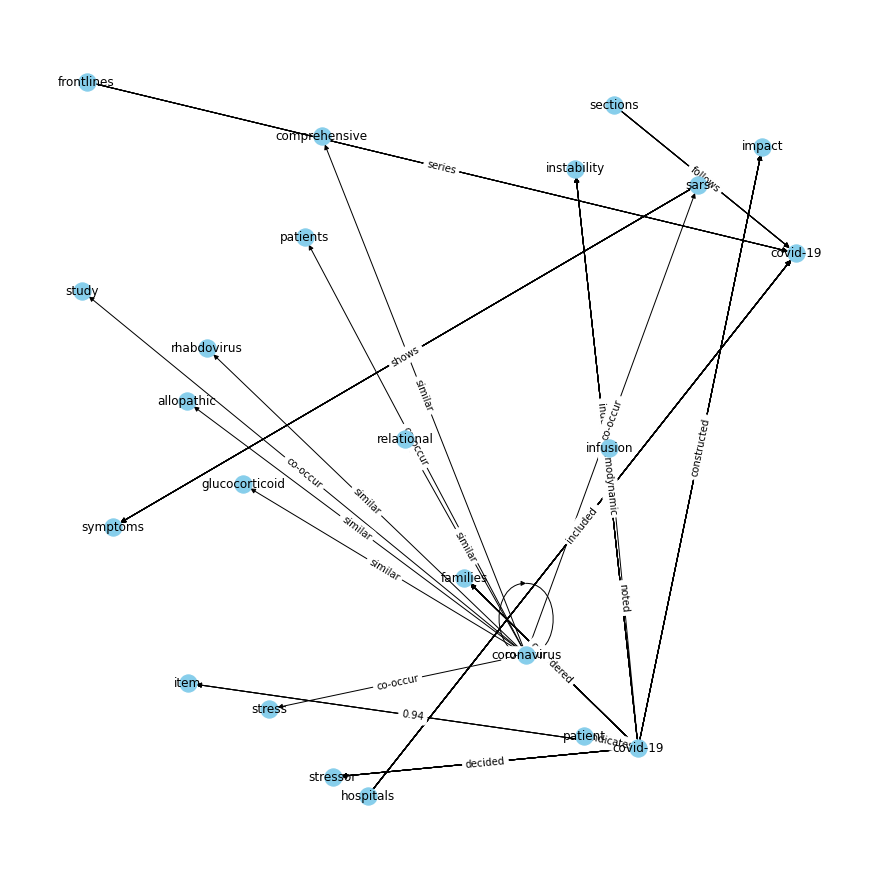

In [28]:
plt.figure(figsize=(12,12))
pos = nx.random_layout(G)
edge_labels = nx.get_edge_attributes(G,'edge')
modify = {}
for k in edge_labels.keys():
    modify[(k[0],k[1])] = edge_labels[k]
nx.draw(G,with_labels=True,node_color='skyblue',edge_cmap=plt.cm.Blues,pos=pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=modify)
plt.show()